# EDA of Student performance dataset
<i> <b> The goal of this EDA would not only be to find insights on the relationship between student grades and external factors but also how these external factors influence each other </b> </i>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Importing the dataset and analyzing it 
<ol>
  <li><b>Looking into all the unique columns and what they mean</b>
    <li><b>Facts about relavent columns</b></li>
</ol

In [2]:
student_df = pd.read_csv("student_data.csv")
student_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Looking into all the unique columns and what they mean

In [3]:
print(student_df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


#### Some facts about the row values of the dataset

* Gender - student's sex (binary: 'F' - female or 'M' - male)

* age - student's age (numeric: from 15 to 22)

* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* traveltime - home to school travel time (numeric: 1 - 1 hour)
* studytime - weekly study time (numeric: 1 - 10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject  (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

### Facts about important columns
1. School name: There is a clear uneven distribution in the schools from which the data is extracted from
2. Sex: There is a healthy distribution of both the sexes in the data. Female > Male in the data
3. Famsize: This data is imbalanced and does not take into consideration other factors like joint family
4. Parental status: Data is unbalanced, 89% together, 10% seperated
5. Guardians: most children have mothers as their guardians with 69% of mothers, 22% fathers and 8% others
6. Paid coaching:There is an almost equal distribution of students who seek tuition and who don't 45% and 54% respectively
7. Extra curricular activities: There's almost an equal distribution of students who do extra curricular activities (51%) and those who dont (49%)
8. Access to internet Over 83% of students have access to the internet which makes this data imbalanced, we will keep it to play around with it
9. Romantic relationships: This is a slightly imbalanced data but not that bad, around 33% of students are in a romantic relationship where as 66% are not.

### Writing a function to automate the column distribution analysis

In [4]:
def find_unique(col_name):
    unique_val_arr = student_df[col_name].unique()
    data = []
    label = []
    for i in unique_val_arr:
        count = student_df[col_name].where(student_df[col_name] == i).count()
        data.append(count)
        label.append(i)
    plt.figure(figsize =(5, 7))
    plt.pie(data,labels = label,autopct='%1.2f%%');
    plt.title(f"Distribution of elements in {col_name} column");
    plt.show()


#### 1) School Name

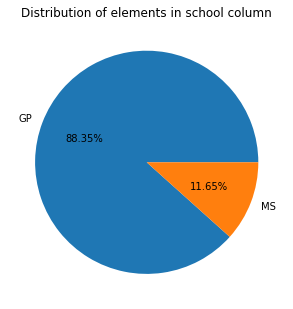

In [5]:
find_unique("school")

##### <i> As we can see, there is a clear uneven distribution in the schools from which the data is extracted from. We might drop this column as it might hinder our analysis </i>

#### 2) Sex

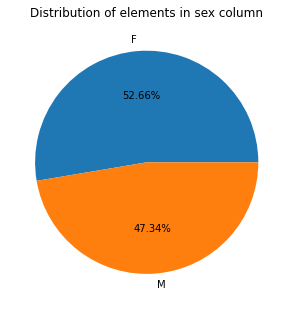

In [6]:
find_unique("sex")

##### <i> There is a healthy distribution of both the sexes in the data. The population of female is just slightly higher than male in the data </i>

#### 3. Family size

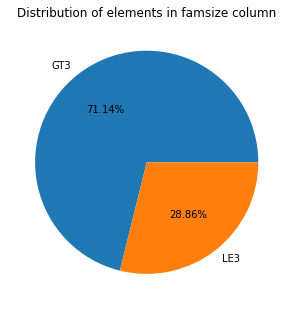

In [7]:
find_unique("famsize")

##### <i> This data is imbalanced and does not take into consideration other factors like joint family, guardians etc so we will not use this data for our analysis

#### 4. pstatus

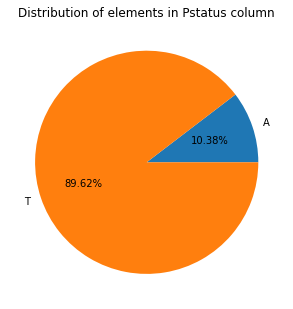

In [8]:
find_unique("Pstatus")

##### <I> Eventho there is an unbalanced distribution this column can help us give some insights on a students performance. So we will keep it and play around with it. Data is unbalanced, 89% together, 10% seperated.

#### 5. Guardian

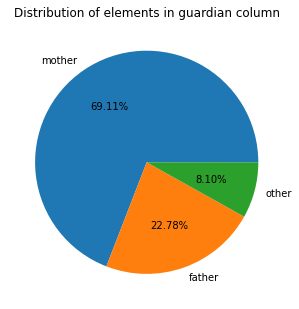

In [9]:
find_unique("guardian")

##### <I> As expected most children have mothers as their guardians with 69% of mothers, 22% fathers and 8% others

#### 6. Extra coaching classes

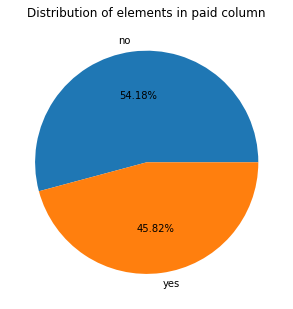

In [10]:
find_unique("paid")

#### <I>There is an almost equal distribution of students who seek tuition and who don't 45% and 54% respectively

#### 7. Extra curricular activities

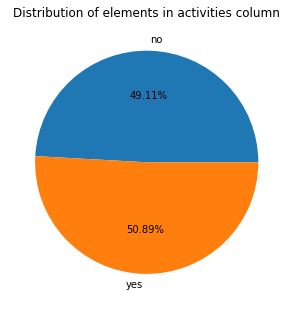

In [11]:
find_unique("activities")

#### <i> Again there's almost an equal distribution of students who do extra curricular activities (51%) and those who dont (49%)

#### 8. Access to internet

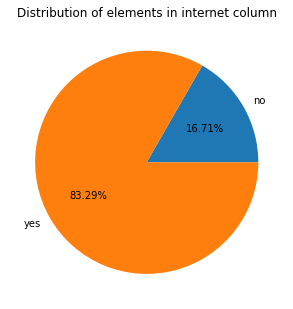

In [12]:
find_unique("internet")

#### <I> Over 83% of students have access to the internet which makes this data imbalanced, we will keep it to play around with it

#### 9. Romantic relationships

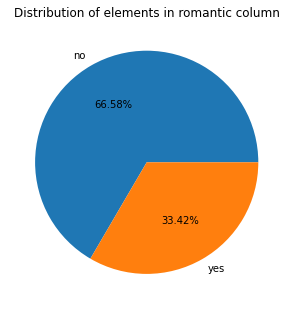

In [13]:
find_unique("romantic")

##### This is a slightly imbalanced data but not that bad, around 33% of students are in a romantic relationship where as 66% are not. However its not clear if this includes their past relationship or only their current so we will exclude this column

## Dropping unwanted columns 
After analyzing the columns and data lets drop all the unwanted columns due to reasons such as umbalanced data, inconsitencies about what the column is about etc

In [14]:
new_stud_df = student_df.drop(["school","address","famsize","Medu","Fedu","reason","traveltime","famsup","schoolsup","nursery","higher","Dalc","Walc","health","romantic"], axis = 1)

In [15]:
new_stud_df.sample(5)

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3
352,M,18,T,at_home,services,mother,1,1,no,no,yes,4,3,3,7,8,7,8
353,M,19,T,other,other,other,1,1,no,no,yes,4,4,4,4,8,8,8
20,M,15,T,teacher,other,mother,2,0,no,no,yes,4,4,1,0,13,14,15
171,M,16,T,other,other,mother,2,0,yes,yes,yes,4,3,2,2,13,15,16
65,F,16,T,teacher,services,mother,2,0,no,yes,yes,5,4,3,2,16,15,15


## Renaming elements for better understanding

#### Renaming elements of pstatus. T = Together, A = apart  using the replace method

In [16]:
new_stud_df["Pstatus"].replace({"T":"Together","A":"Apart"},inplace=True)
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,no,4,3,4,6,5,6,6
1,F,17,Together,at_home,other,father,2,0,no,no,yes,5,3,3,4,5,5,6
2,F,15,Together,at_home,other,mother,2,3,yes,no,yes,4,3,2,10,7,8,10
3,F,15,Together,health,services,mother,3,0,yes,yes,yes,3,2,2,2,15,14,15
4,F,16,Together,other,other,father,2,0,yes,no,no,4,3,2,4,6,10,10


## Adding more columns

### Working column
This column will designate which parent earns in the family 

<b>Finding all the unique elements in each column

In [17]:
print(new_stud_df["Mjob"].unique())
print(new_stud_df["Fjob"].unique())

['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']


<b>Using loc method to create column "working" and using conditional operators in it to identify which parent works and populating the column

In [18]:
new_stud_df.loc[(new_stud_df['Mjob'] != 'at_home') & (new_stud_df['Fjob'] != 'at_home'), 'working'] = 'Both' 
new_stud_df.loc[(new_stud_df["Mjob"] == "at_home") & (new_stud_df["Fjob"] != "at_home"), "working"] = "Father"
new_stud_df.loc[(new_stud_df["Mjob"] != "at_home") & (new_stud_df["Fjob"] == "at_home"), "working"] = "Mother"
new_stud_df.loc[(new_stud_df["Mjob"] == "at_home") & (new_stud_df["Fjob"] == "at_home"), "working"] = "None"

In [19]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,no,4,3,4,6,5,6,6,Father
1,F,17,Together,at_home,other,father,2,0,no,no,yes,5,3,3,4,5,5,6,Father
2,F,15,Together,at_home,other,mother,2,3,yes,no,yes,4,3,2,10,7,8,10,Father
3,F,15,Together,health,services,mother,3,0,yes,yes,yes,3,2,2,2,15,14,15,Both
4,F,16,Together,other,other,father,2,0,yes,no,no,4,3,2,4,6,10,10,Both


### Average grade column
Takes the average of G1,G2 and G3 

In [20]:
new_stud_df["avg_grade"] =round((new_stud_df["G1"]+ new_stud_df["G2"]+ new_stud_df["G3"])/3)

In [21]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,no,4,3,4,6,5,6,6,Father,6.0
1,F,17,Together,at_home,other,father,2,0,no,no,yes,5,3,3,4,5,5,6,Father,5.0
2,F,15,Together,at_home,other,mother,2,3,yes,no,yes,4,3,2,10,7,8,10,Father,8.0
3,F,15,Together,health,services,mother,3,0,yes,yes,yes,3,2,2,2,15,14,15,Both,15.0
4,F,16,Together,other,other,father,2,0,yes,no,no,4,3,2,4,6,10,10,Both,9.0


### Total marks column

In [22]:
new_stud_df["total_marks"] = (new_stud_df["G1"]+ new_stud_df["G2"]+ new_stud_df["G3"])

In [23]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,...,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade,total_marks
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,...,4,3,4,6,5,6,6,Father,6.0,17
1,F,17,Together,at_home,other,father,2,0,no,no,...,5,3,3,4,5,5,6,Father,5.0,16
2,F,15,Together,at_home,other,mother,2,3,yes,no,...,4,3,2,10,7,8,10,Father,8.0,25
3,F,15,Together,health,services,mother,3,0,yes,yes,...,3,2,2,2,15,14,15,Both,15.0,44
4,F,16,Together,other,other,father,2,0,yes,no,...,4,3,2,4,6,10,10,Both,9.0,26


# EDA

## Finding out the max, minimum and average grades in G1, G2, G3 column

In [24]:
grade_count_df = new_stud_df.groupby("avg_grade")[["avg_grade"]].count()
grade_count_df.rename(columns={"avg_grade":"count"},inplace=True)
grade_count_df

,count
avg_grade,
1.0,1
2.0,7
3.0,3
4.0,15
5.0,12
6.0,17
7.0,19
8.0,29
9.0,50


In [25]:
grade_count_df.describe()

,count
count,19.000000
mean,20.789474
std,14.619542
min,1.000000
25%,9.000000
50%,17.000000
75%,32.500000
max,50.000000


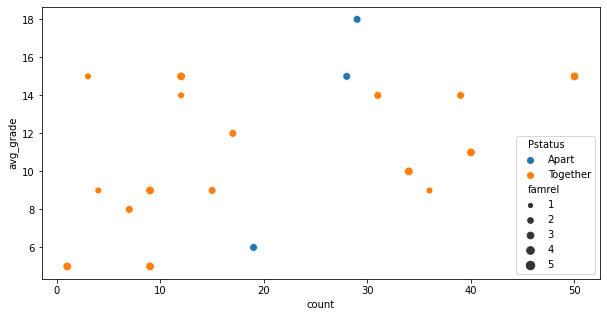

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = grade_count_df["count"],y =new_stud_df.avg_grade ,hue=new_stud_df.Pstatus,size=new_stud_df.famrel);

In [27]:
grade_info = new_stud_df[["G1","G2","G3","avg_grade"]].describe()
grade_info

,G1,G2,G3,avg_grade
count,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,10.660759
std,3.319195,3.761505,4.581443,3.719390
min,3.000000,0.000000,0.000000,1.000000
25%,8.000000,9.000000,8.000000,8.000000
50%,11.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000,13.000000
max,19.000000,19.000000,20.000000,19.000000


 ### Conclusion
 
  1. Students have scored an average of 10.7 in G1,G2,G3
  2. The  minimum grade in G1,G2,G3 is around 3,0,0 respectively
  3. The maximum score for G1,G2,G3 is 19,19,20 respectively
  4. Most students have scored around a percentage of 65% with an average score of 55% <i>
  5. Around 50 students have scored 9 in an average

In [28]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,...,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade,total_marks
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,...,4,3,4,6,5,6,6,Father,6.0,17
1,F,17,Together,at_home,other,father,2,0,no,no,...,5,3,3,4,5,5,6,Father,5.0,16
2,F,15,Together,at_home,other,mother,2,3,yes,no,...,4,3,2,10,7,8,10,Father,8.0,25
3,F,15,Together,health,services,mother,3,0,yes,yes,...,3,2,2,2,15,14,15,Both,15.0,44
4,F,16,Together,other,other,father,2,0,yes,no,...,4,3,2,4,6,10,10,Both,9.0,26


We are going to use the plt.subplots method to create a grid in which we will plot all the 4 graphs using the sns.barplot method

# 1) How students have scored in terms of gender

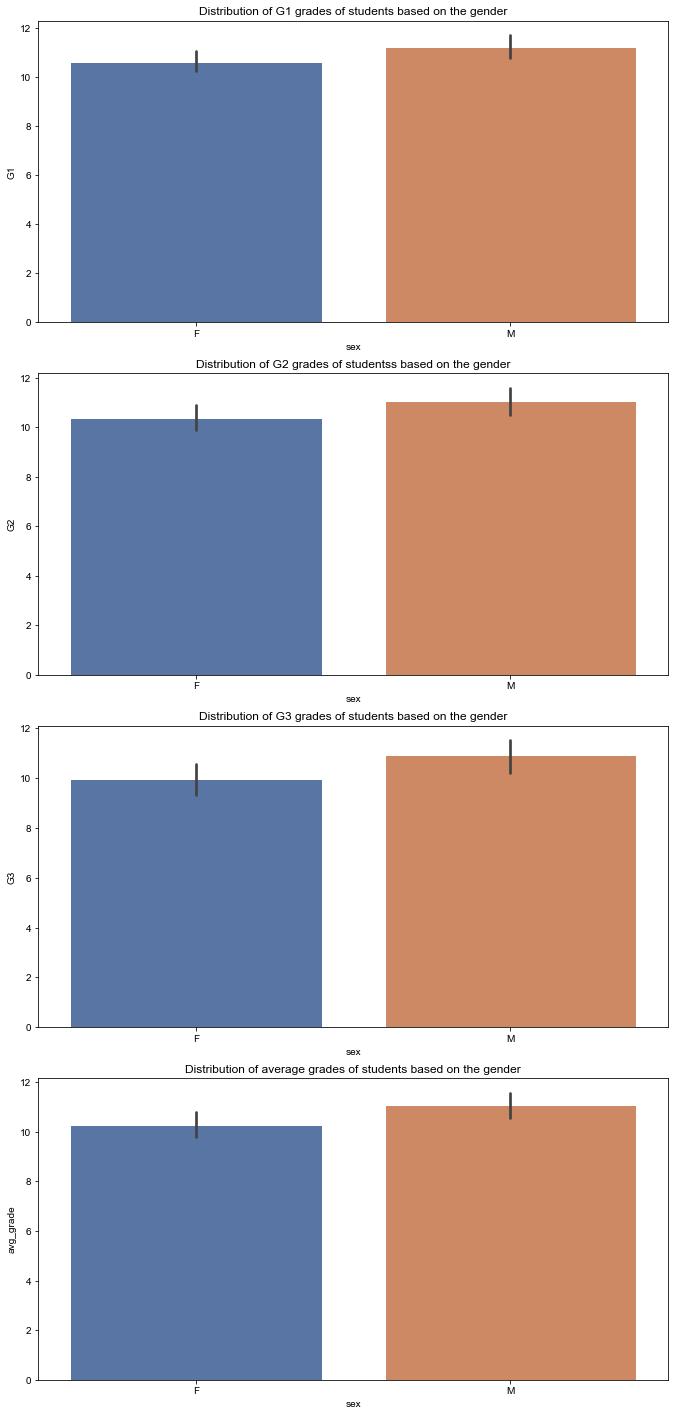

In [29]:
fig, axes = plt.subplots(4,figsize = (10,20)) #Creating the grid
plt.tight_layout(pad=3) #Adding the padding between each row

sns.set_theme(style="darkgrid") #Setting the style

# Naming each axis
axes[0].set_title('Distribution of G1 grades of students based on the gender');
axes[1].set_title('Distribution of G2 grades of studentss based on the gender');
axes[2].set_title('Distribution of G3 grades of students based on the gender');
axes[3].set_title('Distribution of average grades of students based on the gender');

#Plotting
x = new_stud_df["sex"]
sns.barplot(x = x,y = new_stud_df["G1"],ax = axes[0]);
sns.barplot(x = x,y = new_stud_df["G2"],ax = axes[1]);
sns.barplot(x = x,y = new_stud_df["G3"],ax = axes[2]);
sns.barplot(x = x,y = new_stud_df["avg_grade"],ax = axes[3]);

### Conclusion: <i> As we can see from the graphs above, in an average male students scored 1 to half a mark more than female students in all the 3 examinations. The variance in the plots also seems to be less

In [30]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,...,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade,total_marks
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,...,4,3,4,6,5,6,6,Father,6.0,17
1,F,17,Together,at_home,other,father,2,0,no,no,...,5,3,3,4,5,5,6,Father,5.0,16
2,F,15,Together,at_home,other,mother,2,3,yes,no,...,4,3,2,10,7,8,10,Father,8.0,25
3,F,15,Together,health,services,mother,3,0,yes,yes,...,3,2,2,2,15,14,15,Both,15.0,44
4,F,16,Together,other,other,father,2,0,yes,no,...,4,3,2,4,6,10,10,Both,9.0,26


# 2) Analyzing how family conditions affect the grades of the students
1. Average grades and family relationship
2. Average grades and if their parents are together or apart
3. Average grades and which member/s of the student's family earns

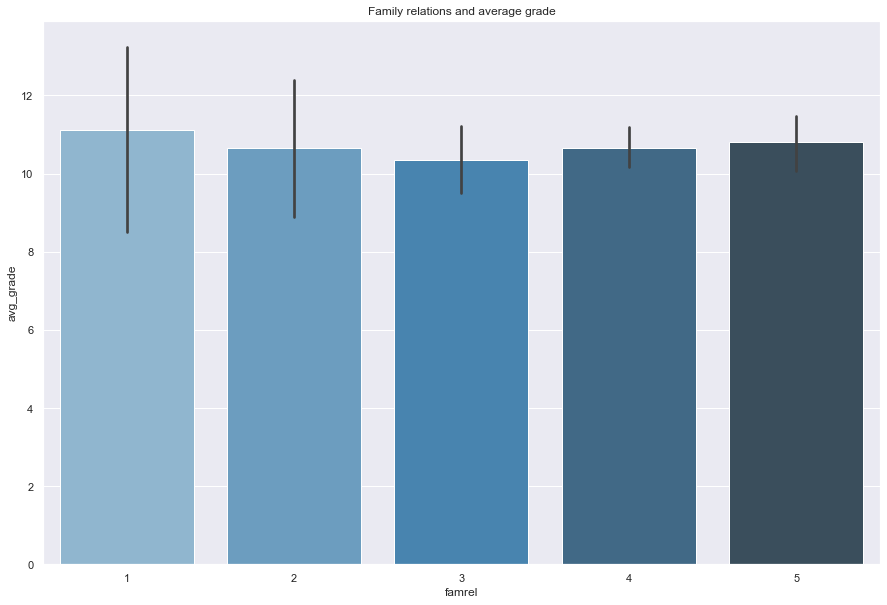

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x = new_stud_df.famrel,y = new_stud_df.avg_grade,palette="Blues_d");
plt.title("Family relations and average grade");

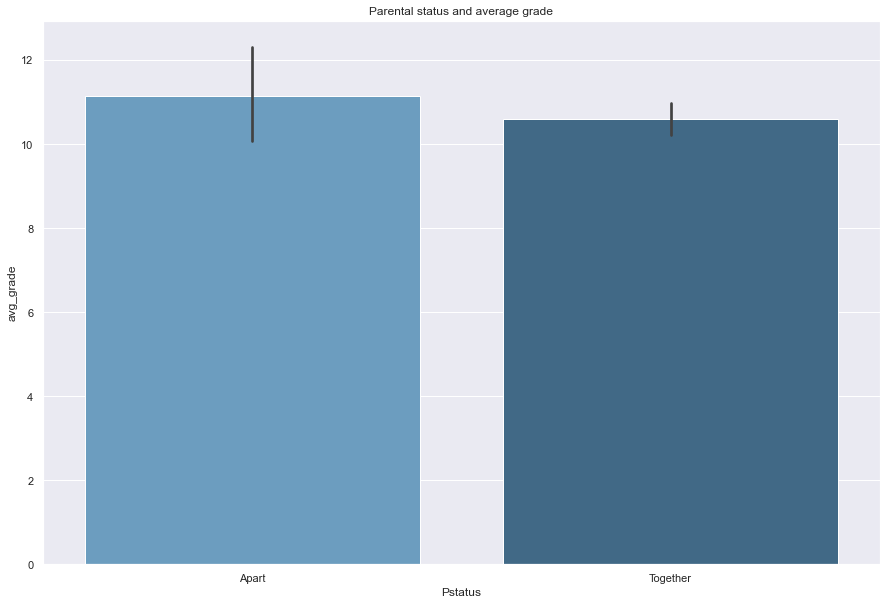

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x = new_stud_df.Pstatus,y = new_stud_df.avg_grade,palette="Blues_d");
plt.title("Parental status and average grade");

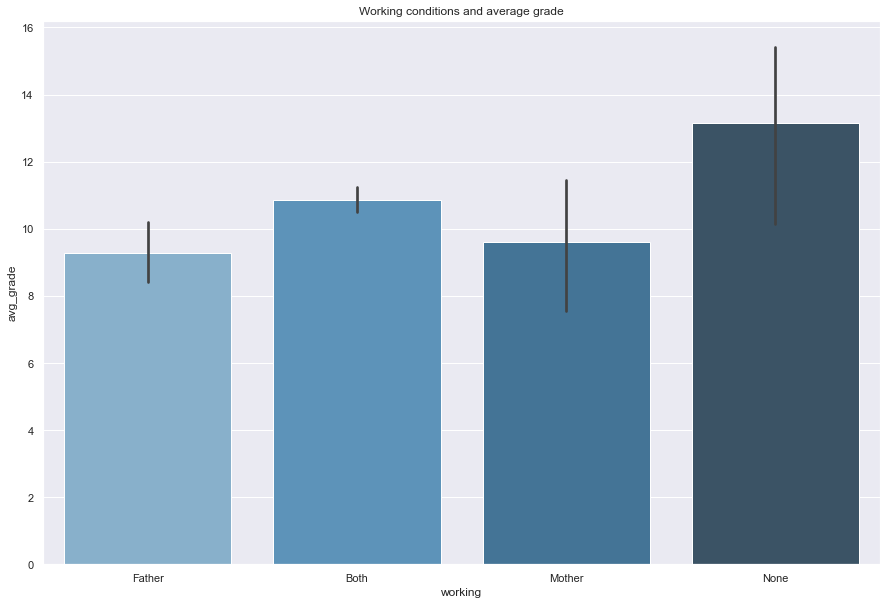

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x = new_stud_df.working,y = new_stud_df.avg_grade,palette="Blues_d");
plt.title("Working conditions and average grade");

### Conclusion: 
### 1. Family relations: Students with good family relations (4-5) consistently score higher as seen in the graph, there is a group of students who score even higher with bad family relationships but it seems to have high variance
### 2. Parental Status: Looking at the graph it does look like students with seperated parents score well however the variance seems to be high, we can say parents being together or apart does not show any conclusive effect on the grades in this data
### 3. Working conditions: Students with both working parents consistently score higher than students having a single working parent. It does seem a lot of students with no working parents score the highest but there is a huge variance in the data it seems

In [34]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,...,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade,total_marks
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,...,4,3,4,6,5,6,6,Father,6.0,17
1,F,17,Together,at_home,other,father,2,0,no,no,...,5,3,3,4,5,5,6,Father,5.0,16
2,F,15,Together,at_home,other,mother,2,3,yes,no,...,4,3,2,10,7,8,10,Father,8.0,25
3,F,15,Together,health,services,mother,3,0,yes,yes,...,3,2,2,2,15,14,15,Both,15.0,44
4,F,16,Together,other,other,father,2,0,yes,no,...,4,3,2,4,6,10,10,Both,9.0,26


### Dropping Mjob and Fjob columns

In [35]:
new_stud_df.drop(columns = ["Mjob","Fjob"],index=1, inplace=True)
new_stud_df.sample(5)

,sex,age,Pstatus,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade,total_marks
302,F,17,Together,mother,3,0,yes,no,yes,4,3,3,0,15,12,14,Both,14.0,41
251,M,16,Together,other,2,0,no,no,yes,5,3,3,6,7,10,10,Father,9.0,27
330,M,18,Together,mother,4,0,no,yes,yes,4,5,5,2,9,8,8,Both,8.0,25
254,M,17,Together,mother,1,0,no,no,yes,4,4,2,0,8,12,12,Both,11.0,32
48,M,15,Together,mother,2,0,yes,no,no,4,3,3,2,15,15,14,Both,15.0,44


# 3) Relationship between services a student has access to and their performance
1. Access to internet: Does access to internet has a negative or positive effect in a students grades
2. Paid classes: Do paid classes actually help students score higher marks

### As we saw earlier, most students have a direct access to internet. To analyze properly we have to choose a small sample of students who have access to internet which is equal to the number of students who do not have access to the internet

<i> Using the count function we will first count the number of students who have no access to the internet

In [36]:
count = student_df["internet"].where(student_df["internet"] == "no").count()
count

66

<i> Using loc method we extract a sample of random 66 rows which have access to the internet and create a dataframe of it
    We will also create a dataframe which contains the data for all students who dont have access to internet

In [37]:
access_internet_df = new_stud_df.loc[(new_stud_df["internet"]) == "yes"].sample(66)
no_internet_df = new_stud_df.loc[(new_stud_df["internet"]) == "no"]

In [38]:
access_internet_df.head()

,sex,age,Pstatus,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade,total_marks
193,M,16,Together,mother,1,0,no,yes,yes,4,3,2,8,8,9,10,Both,9.0,27
362,F,18,Together,mother,2,0,no,no,yes,4,3,2,0,11,11,10,Both,11.0,32
258,M,18,Together,mother,2,0,no,yes,yes,5,2,4,8,15,14,14,Both,14.0,43
77,F,16,Together,mother,4,0,yes,no,yes,5,2,3,0,11,11,11,Both,11.0,33
363,F,17,Together,mother,2,0,yes,yes,yes,2,3,4,0,16,15,15,None,15.0,46


<i> Using the concat pethod I concatinated both the data frames

In [39]:
access_internet_df = pd.concat([access_internet_df,no_internet_df])

In [40]:
access_internet_df.head()

,sex,age,Pstatus,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade,total_marks
193,M,16,Together,mother,1,0,no,yes,yes,4,3,2,8,8,9,10,Both,9.0,27
362,F,18,Together,mother,2,0,no,no,yes,4,3,2,0,11,11,10,Both,11.0,32
258,M,18,Together,mother,2,0,no,yes,yes,5,2,4,8,15,14,14,Both,14.0,43
77,F,16,Together,mother,4,0,yes,no,yes,5,2,3,0,11,11,11,Both,11.0,33
363,F,17,Together,mother,2,0,yes,yes,yes,2,3,4,0,16,15,15,None,15.0,46


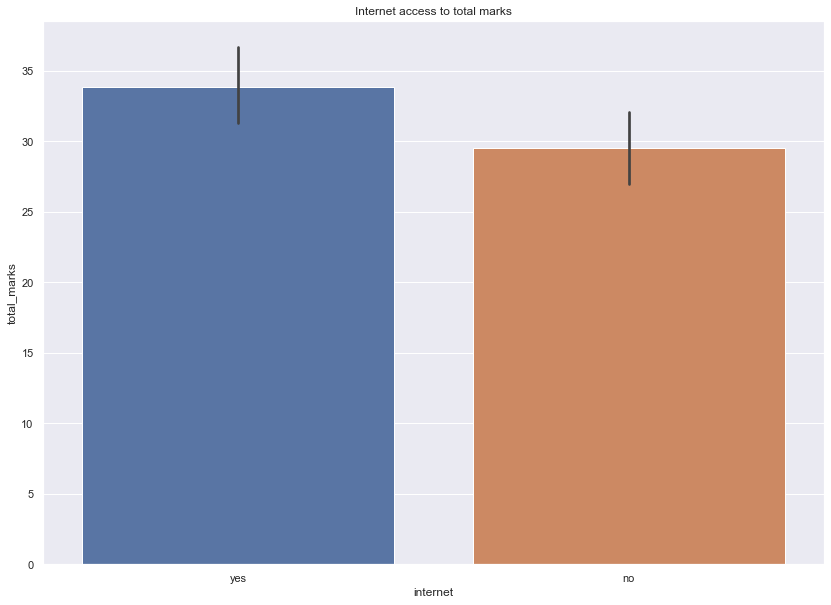

In [44]:
plt.figure(figsize=(14,10))
sns.barplot(x = access_internet_df["internet"],y = access_internet_df["total_marks"]);
plt.title("Internet access to total marks");

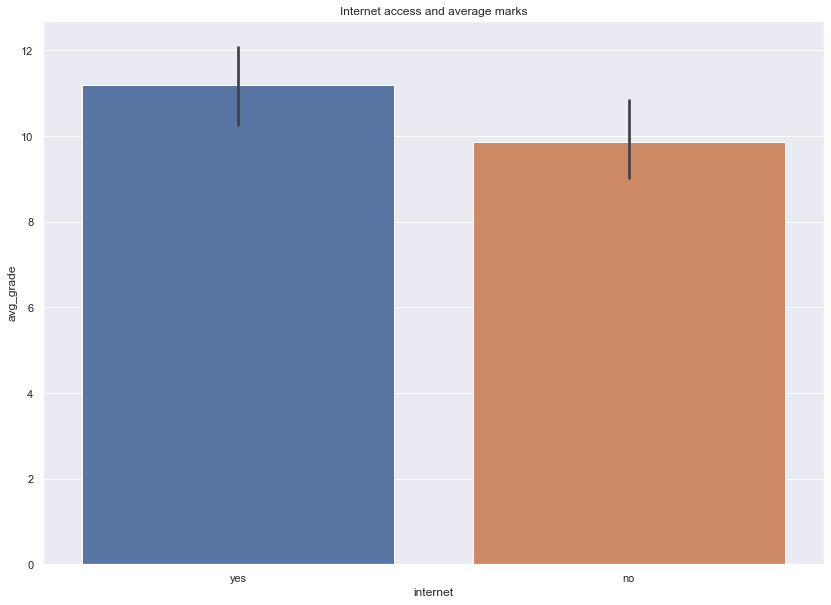

In [42]:
plt.figure(figsize=(14,10))
sns.barplot(x = access_internet_df["internet"],y = access_internet_df["avg_grade"]);
plt.title("Internet access and average marks");

### Conclusion: We can conclude that students have access to an active internet connection usually score higher than students who do not have an active internet connection

### There's an almost equal distribution of students who go to coaching and dont go to coaching, so we dont need to select a sample to data to perform analysis. We are going to perform the analysis using the entire dataset

Text(0.5, 1.0, 'Paid classes and average grade')

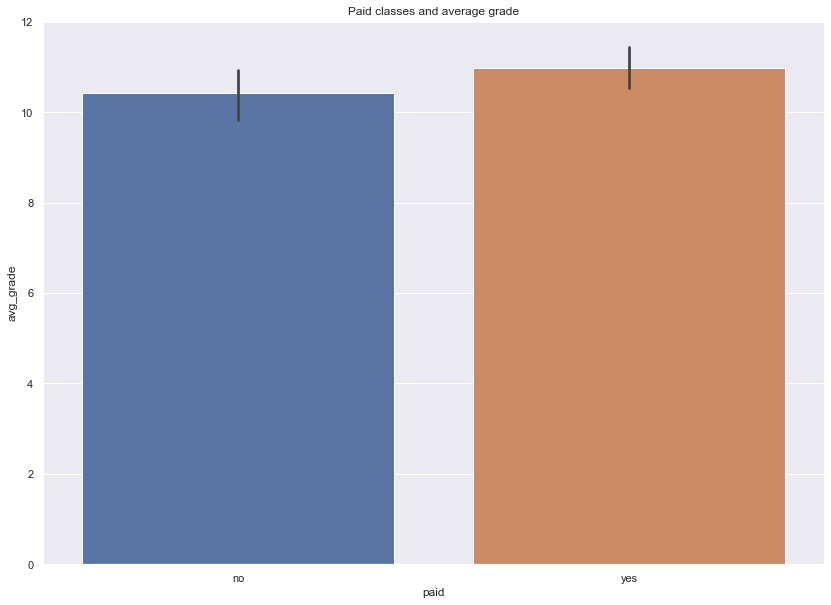

In [51]:
plt.figure(figsize=(14,10))
sns.barplot(x = new_stud_df["paid"],y = new_stud_df["avg_grade"]);
plt.title("Paid classes and average grade")

Text(0.5, 1.0, 'Paid classes and total marks')

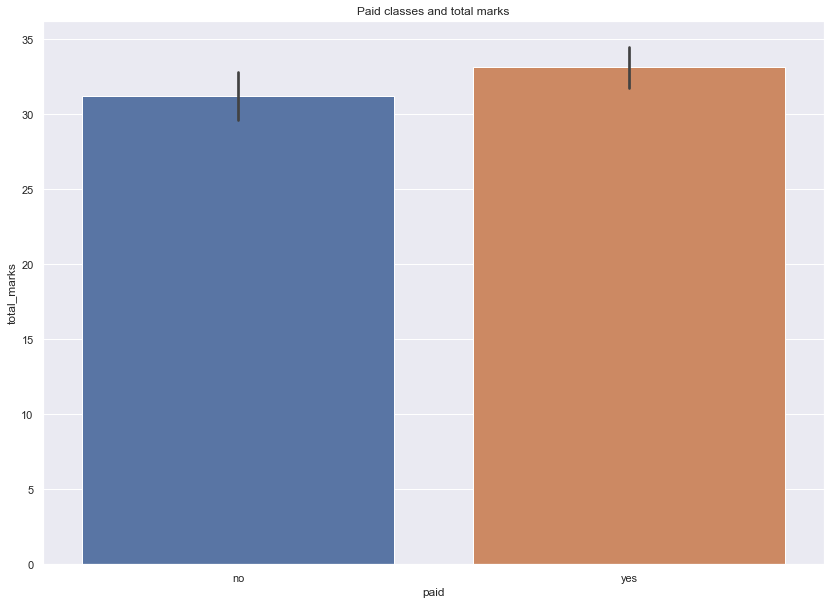

In [62]:
plt.figure(figsize=(14,10))
sns.barplot(x = new_stud_df["paid"],y = new_stud_df["total_marks"]);
plt.title("Paid classes and total marks")

### Conclusion: As aspected students who have coaching classes usually score higher than students who dont get them

# Do students who frequently dont go out score good ?

Text(0.5, 1.0, 'average grade and how much they go out')

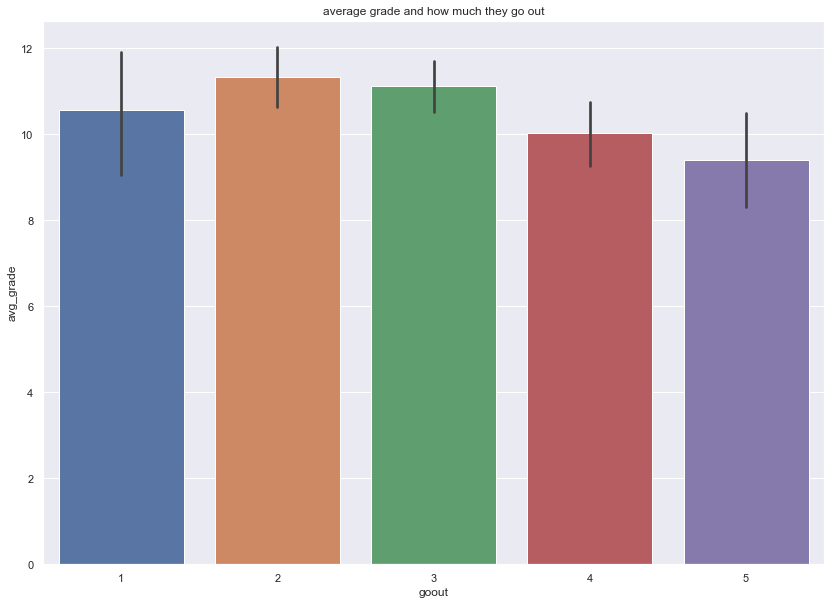

In [155]:
plt.figure(figsize=(14,10))
sns.barplot(x = new_stud_df["goout"],y = new_stud_df["avg_grade"]);
plt.title("average grade and how much they go out");

### At a glance it does seem that students who dont go out much do score more, however we cant be sure if those students are anti-social. It can also mean those students may go to extra coaching classes as we see in the linegraph below, the graph is linear. Meaning students who get less freetime go out less. Meaning they might spend their time in coaching classes and scoring good.

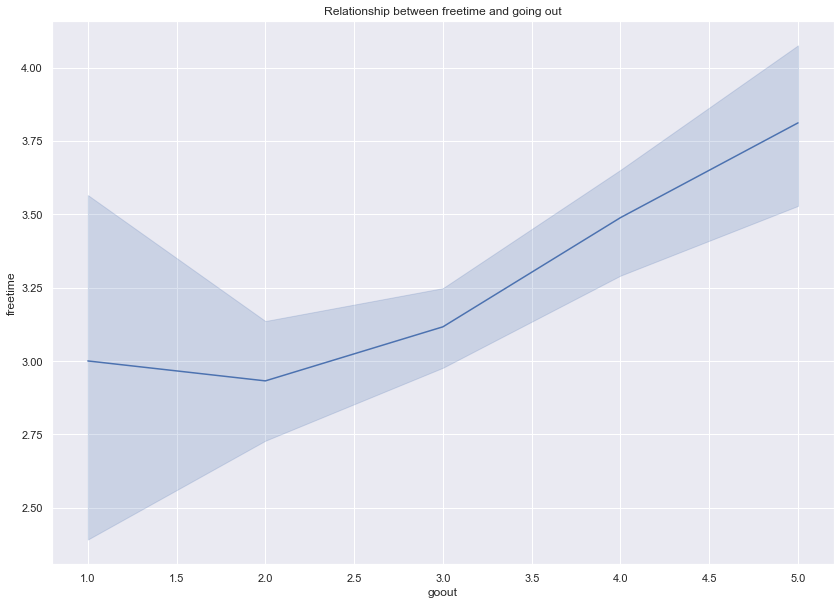

In [159]:
plt.figure(figsize=(14,10))
sns.lineplot(x = new_stud_df["goout"],y = new_stud_df["freetime"]);
plt.title("Relationship between freetime and going out");

### We can say students who dont get coaching classes and still score good are shy students. We can figure how many students get coaching classes, classify them by the goout column and then analyze this

Here we are counting the students who go and dont go to coaching classes. 
To do that first we will use the "groupby" function to get the data by the going out quality then count the total number of students who get coaching classes and group them by how much they go out

In [123]:
x = new_stud_df.groupby("goout")
gout_dict = {} ## creating a dictionary to store the values
for i in x:
    yes_total = 0
    no_total  = 0
    truth_series = i[1]["paid"]
    for item in truth_series:
        if item=="yes":
            yes_total+=1
        else:
            no_total+=1
    gout_dict[str(i[0])] = [yes_total,no_total]
    
gout_dict

{'1': [7, 16], '2': [51, 52], '3': [58, 71], '4': [43, 43], '5': [22, 31]}

In [146]:
gout = pd.DataFrame()
gout["going_out"] = [x for x in gout_dict.keys()]
gout[["paid_yes","paid_no"]] = [x for x in gout_dict.values()]

In [147]:
gout

,going_out,paid_yes,paid_no
0,1,7,16
1,2,51,52
2,3,58,71
3,4,43,43
4,5,22,31


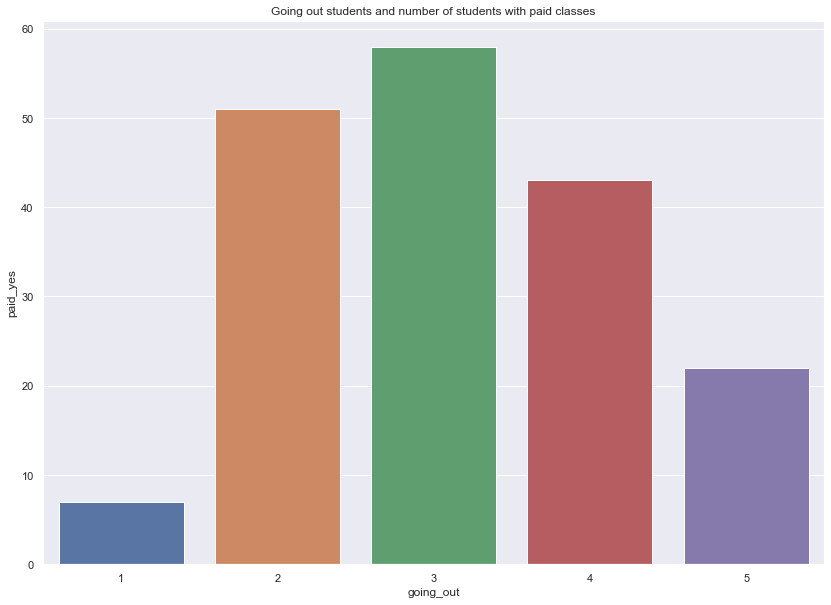

In [162]:
plt.figure(figsize=(14,10))
sns.barplot(x = gout["going_out"],y = gout["paid_yes"]);
plt.title("Going out students and number of students with paid classes");

### Yes, as we can see students who go out less get less coaching classes. 

### Conclusion: In a lot of cases students who don't frequently go out score good inspite of not getting coaching classes


# We have analyzed most things that can affect grades, here is a rundown of all the conclusions we have gathered
>  1. On average male students scored 1 to half a mark more than female students in all the 3 examinations. 
>  2. Students with good family relations (4-5) consistently score higher. There is indeed a group of students who score even higher with bad family relationships but it seems to have high variance
>  3. Students with seperated parents score well however the variance seems to be high, we can say parents being together or apart does not show any conclusive effect on the grades in this data.
>  4. Students with both working parents consistently score higher than students having a single working parent. It does seem a lot of students with no working parents score the highest but there is a huge variance in the data it seems
>  5. Students that have access to an active internet connection usually score higher than students who do not have an active internet connection
>  6. Students who have coaching classes usually score higher than students who dont get them
>  7. In a lot of cases students who don't frequently go out score good inspite of not getting coaching classes